# Explanatory Data Analysis

In [36]:
%run "../../Libraries/Display.ipynb"
%run "../../Libraries/Standard.ipynb"
%run "../../Libraries/Style.ipynb"
%run "../../Core/Standard.ipynb"

In [37]:
style.use('seaborn-whitegrid') or plt.style.use('seaborn-whitegrid')

plt.style.use('seaborn-whitegrid')

sns.set(style="ticks", color_codes=True)

In [38]:
data = pd.read_csv("../../Data/Funding_Companies/data.csv")

print("Dimensions: " + str(data.shape))

Dimensions: (37621, 103)


In [39]:
data.head(10)

Location Date of Incorporation  \
0                    London            23/12/1936   
1                South West            23/10/1975   
2                       NaN            13/01/1926   
3           East of England            06/10/1947   
4           East of England            23/10/1956   
5                South East            08/05/1915   
6                South East            10/12/1932   
7                    London            15/04/1947   
8           East of England            28/12/1923   
9  Yorkshire and The Humber            15/06/1966   

                                        SIC Industry  SIC short  \
0                           Other Service activities       9609   
1                                  Business services       8020   
2  Wholesale and retail,motor vehicle repair,sale...       4624   
3                            All other Manufacturing       3250   
4                            All other Manufacturing       3109   
5  Manufacture computer, electronic, light electr...       2651   
6                         Transportation and Storage       5210   
7                                  Business services       6612   
8  Construction (including development of real es...       4399   
9  Manufacture computer, electronic, light electr...       2651   

   Total Sales / Turnover (Period 1)  Total Sales / Turnover (Period 2)  \
0                            8578000                          7820000.0   
1                            1610000                          1417000.0   
2                            1631322                          2523817.0   
3                            1045187                          1110000.0   
4                            6199220                          5808238.0   
5                            4617000                          5083000.0   
6                            8251122                          6774171.0   
7                            2704000                          2169000.0   
8                            3660143                          4675056.0   
9                            7797000                          6805000.0   

   Total Sales / Turnover (Period 3) Turnover size 3 year Performance  \
0                          7956000.0           >5m             Growth   
1                          1460000.0           <5m             Growth   
2                          7284779.0           <5m            Decline   
3                          2198000.0           <5m            Decline   
4                          5175177.0           >5m             Growth   
5                          3569000.0           <5m             Growth   
6                          8005323.0           >5m             Steady   
7                          3050000.0           <5m            Decline   
8                          4138419.0           <5m            Decline   
9                          7557000.0           >5m             Steady   

   Growth in Total Sales (Period 1)          ...            \
0                              0.10          ...             
1                              0.14          ...             
2                             -0.35          ...             
3                             -0.06          ...             
4                              0.07          ...             
5                             -0.09          ...             
6                              0.22          ...             
7                              0.25          ...             
8                             -0.22          ...             
9                              0.15          ...             

   Borrowings (current) (Period 2)  Borrowings (current) (Period 3)  \
0                         219000.0                         135000.0   
1                         267000.0                       10962000.0   
2                              NaN                              NaN   
3                        6461000.0                        5535000.0   
4                        1401

In [40]:
print(empty_columns(data))

Export Sales (Period 3)                   17864
Export Sales (Period 2)                   17419
UK Sales (Period 3)                       17241
Export Sales (Period 1)                   16990
UK Sales (Period 2)                       16834
UK Sales (Period 1)                       16410
Trade Creditors/Debtors (Period 3)        12930
Total Sales per Employee (Period 3)       11824
Gross Profit (Period 3)                   11285
Trade Creditors/Debtors (Period 2)        11281
Trade Creditors/Debtors (Period 1)        10981
Total Sales per Employee (Period 2)       10066
Gross Profit (Period 2)                    9187
Total Sales per Employee (Period 1)        8457
Employee Size                              8457
Growth in Total Sales (Period 3)           8307
Trade Debtors (Period 3)                   8015
Number of Employees (Period 3)             7778
Gross Profit (Period 1)                    7304
Raw Materials / Stocks (Period 3)          6620
Work in Progress (Period 3)             

Remove all features (columns) that have less than 25% information.

In [41]:
data = data.loc[:, data.isnull().mean() <= .25]
print("Dimensions: " + str(data.shape))

Dimensions: (37621, 91)


Convert dates to years of existance and take companies that exist the last 20 years.

In [42]:
data['Date of Incorporation'] = pd.to_datetime(data['Date of Incorporation'])

data['Date of Incorporation'] = abs(round(data['Date of Incorporation'].apply(lambda x:(datetime.today()-x).days)/365, 1))

data['Date of Incorporation'] = (data['Date of Incorporation'].fillna(data['Date of Incorporation'].median()))

data = data.loc[data['Date of Incorporation'] <= 20]

print("Dimensions: " + str(data.shape))

Dimensions: (20244, 91)


Drop all rows that do not have all information in the columns 'Profitability', 'Turnover size', 'Net Asset Size', '3 year Performance', 'GP Movement', 'Export Mix', 'Employee Size' and 'Comm Delphi Score Cur'. These columns are very important (based on business logic). Moreover, remove all rows that have less than 80% of information

In [43]:
data = data.dropna(subset=['Profitability', 'Turnover size', 'Net Asset Size', '3 year Performance', 'GP Movement', 'Export Mix', 'Employee Size', 'Comm Delphi Score Cur'])

data = data.dropna(thresh=math.floor(len(data.columns)*0.8))

print("Dimensions: " + str(data.shape))

Dimensions: (11560, 91)


Distribution of years 0-25. As we can see most of them exist at least 5 years.

In [44]:
data['Date of Incorporation'].iplot(kind='hist', xTitle='Years', yTitle='count', title='Years of existance')

Industry that they belong. Although it is not clear the name of each industry, we can see that some industries tend to have more businesses.

In [45]:
data['SIC Industry'].iplot(kind='hist', xTitle='Industry', yTitle='count', title='Industries')

Most of the business have at least 5m turnover.

In [46]:
data['Turnover size'].iplot(kind='hist', xTitle='Turnover', yTitle='count', title='Turnover size')

Distribution of total sales.

In [47]:
data['Total Sales / Turnover (Period 1)'].iplot(kind='hist', xTitle='Turnonver', yTitle='count', title='Total Sales / Turnover (Period 1)')

In [48]:
data['3 year Performance'].iplot(kind='hist', xTitle='Performance', yTitle='count', title='3 year Performance')

The variable export Mix has a lot of outliers (probably).

In [49]:
data['Export Mix'].iplot(kind='hist', xTitle='Export', yTitle='count', title='Export Mix')

Log values will not fix the problem.

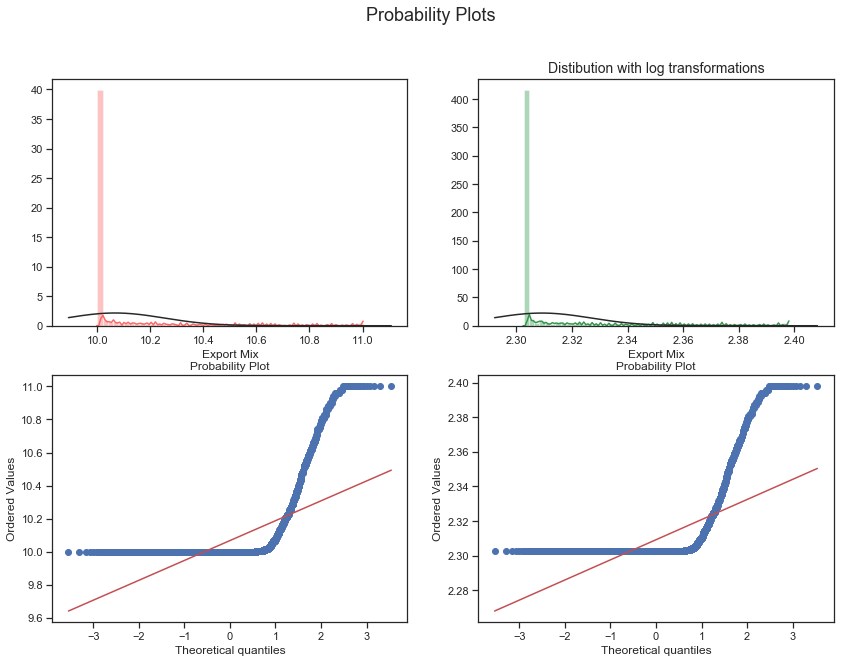

In [50]:
df = data.dropna()
df['Export Mix'] = (df['Export Mix']*df['Export Mix']+10)
plot_log(df, 'Export Mix')

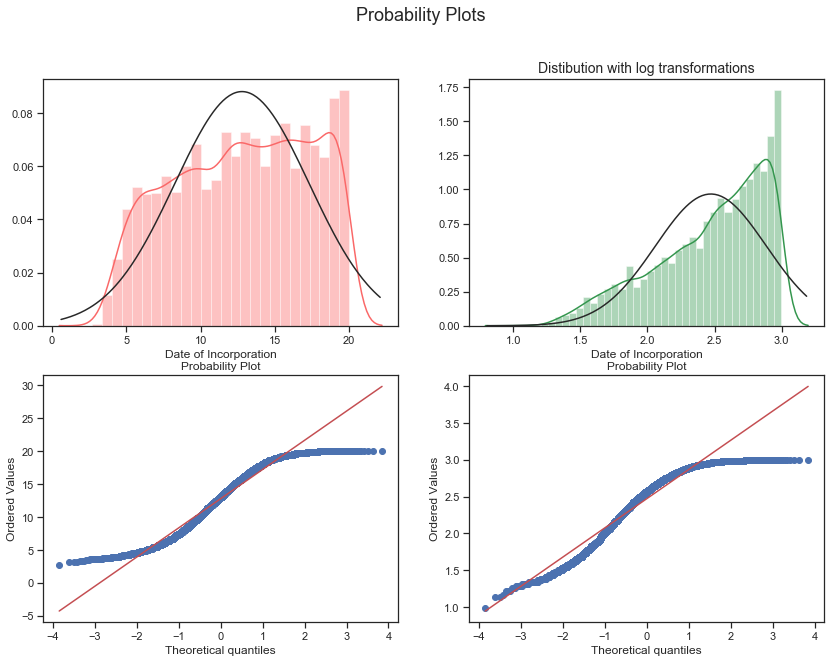

In [51]:
plot_log(data, 'Date of Incorporation')

In [52]:
data['GP Movement'].iplot(kind='hist', xTitle='GP', yTitle='count', title='GP Movement')

There are outliers in the GP% variable.

In [53]:
data['GP% 1'].iplot(kind='hist', xTitle='GP%', yTitle='count', title='GP% 1')

In [102]:
data['working Capital/total sales'].iplot(kind='hist', xTitle='Working Capital per total sales', yTitle='count', title='working Capital/total sales')

In [54]:
data['Profitability'].iplot(kind='hist', xTitle='Profitability', yTitle='count', title='Profitability')

In [55]:
data['Employee Size'].iplot(kind='hist', xTitle='Employee Size', yTitle='count', title='Employee Size')

Number of employees variable seems ot have outliers

In [56]:
data['Number of Employees (Period 1)'].iplot(kind='hist', xTitle='Number of Employees (Period 1)', yTitle='count', title='Number of Employees (Period 1)')

In [57]:
data['Net Asset Size'].iplot(kind='hist', xTitle='Net Asset Size', yTitle='count', title='Net Asset Size')

Distribution of 'Total Net Assets (Period 1)'. The feature 'Total Net Assets (Period 1)' probably has outliers.

In [58]:
data['Total Net Assets (Period 1)'].iplot(kind='hist', xTitle='Total Net Assets (Period 1)', yTitle='count', title='Total Net Assets (Period 1)')

In [59]:
data['Comm Delphi Score Cur'].iplot(kind='hist', xTitle='Comm Delphi Score Cur', yTitle='count', title='Comm Delphi Score Cur')

Distribution of 'Growth in Total Sales (Period 1)'. The feature 'Growth in Total Sales (Period 1)' probably has outliers.

In [60]:
data['Growth in Total Sales (Period 1)'].iplot(kind='hist', xTitle='Growth in Total Sales (Period 1)', yTitle='count', title='Growth in Total Sales (Period 1)')

### Group Categorical Values

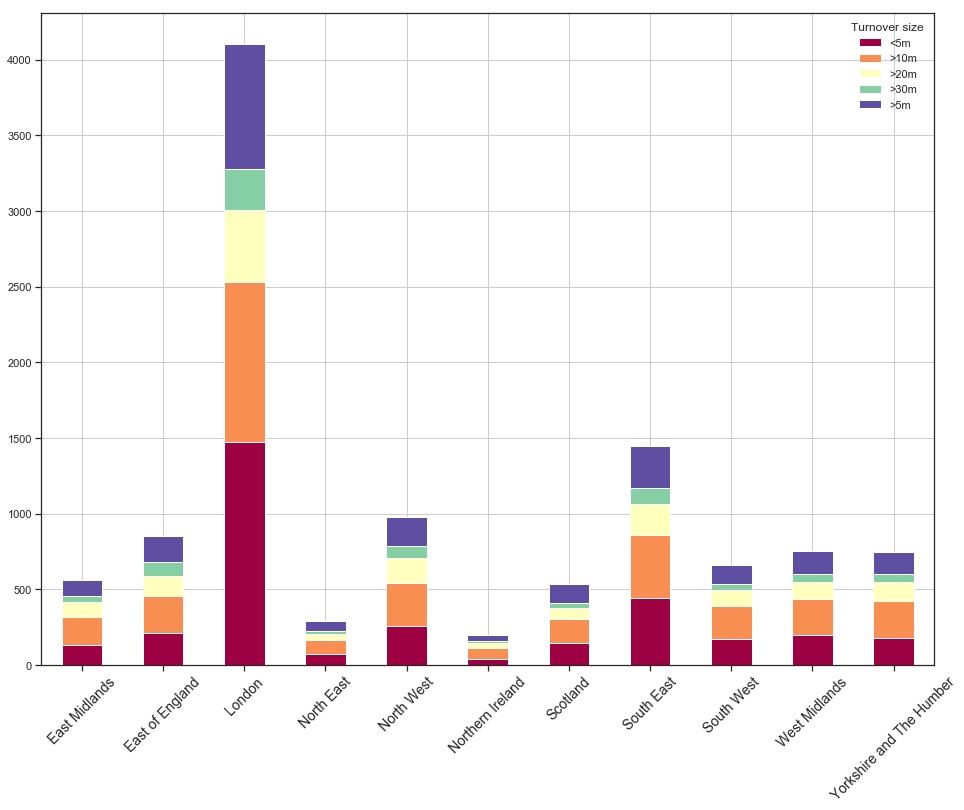

In [61]:
plot_stack(data, ['Location', 'Turnover size'])

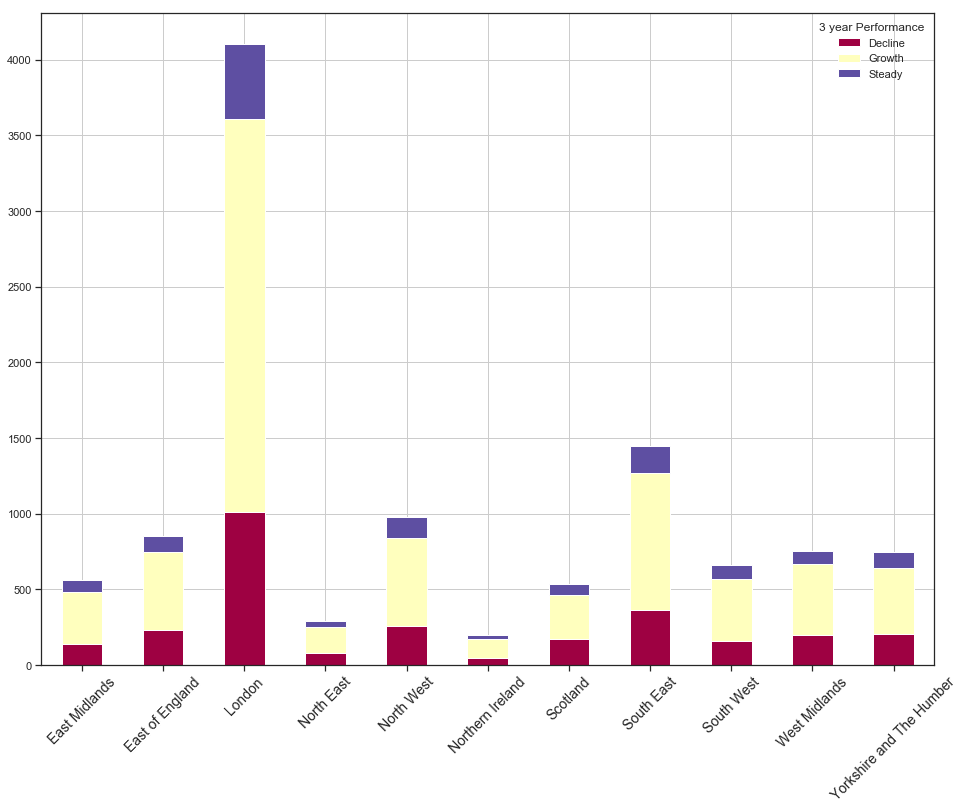

In [62]:
plot_stack(data, ['Location', '3 year Performance'])

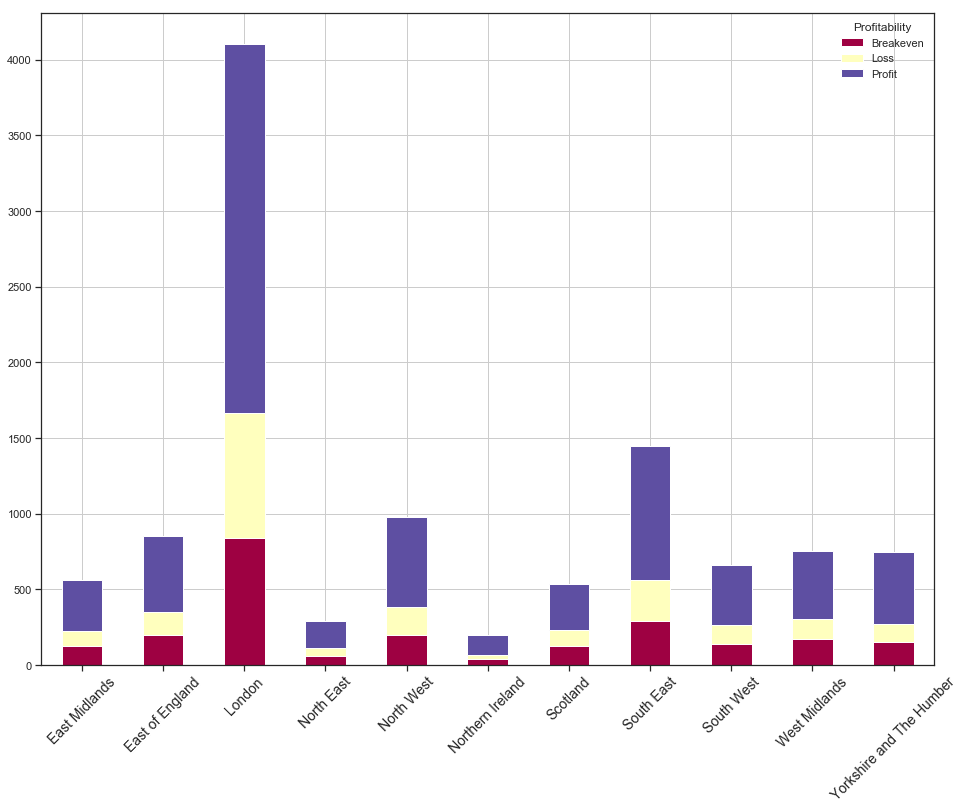

In [63]:
plot_stack(data, ['Location', 'Profitability'])

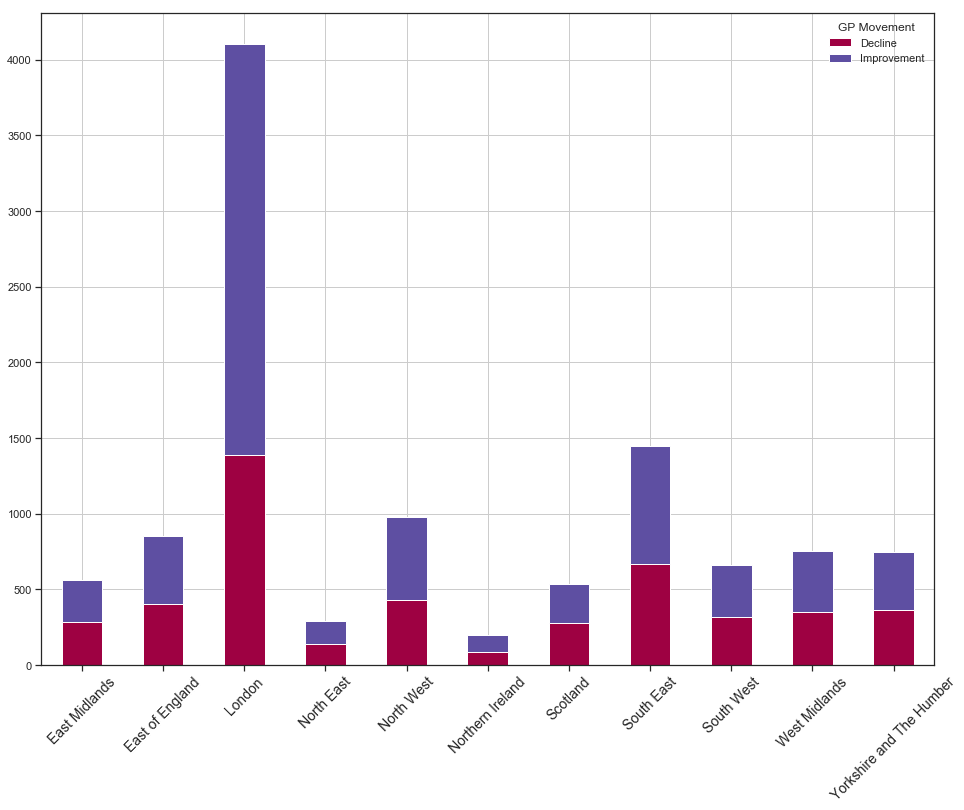

In [64]:
plot_stack(data, ['Location', 'GP Movement'])

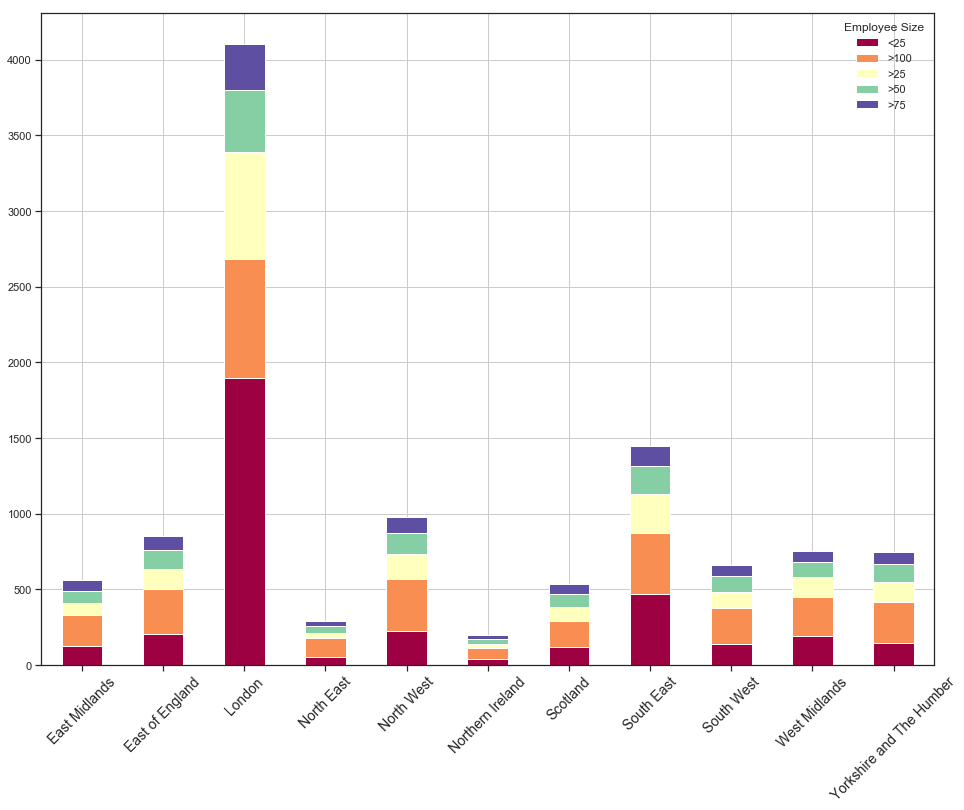

In [65]:
plot_stack(data, ['Location', 'Employee Size'])

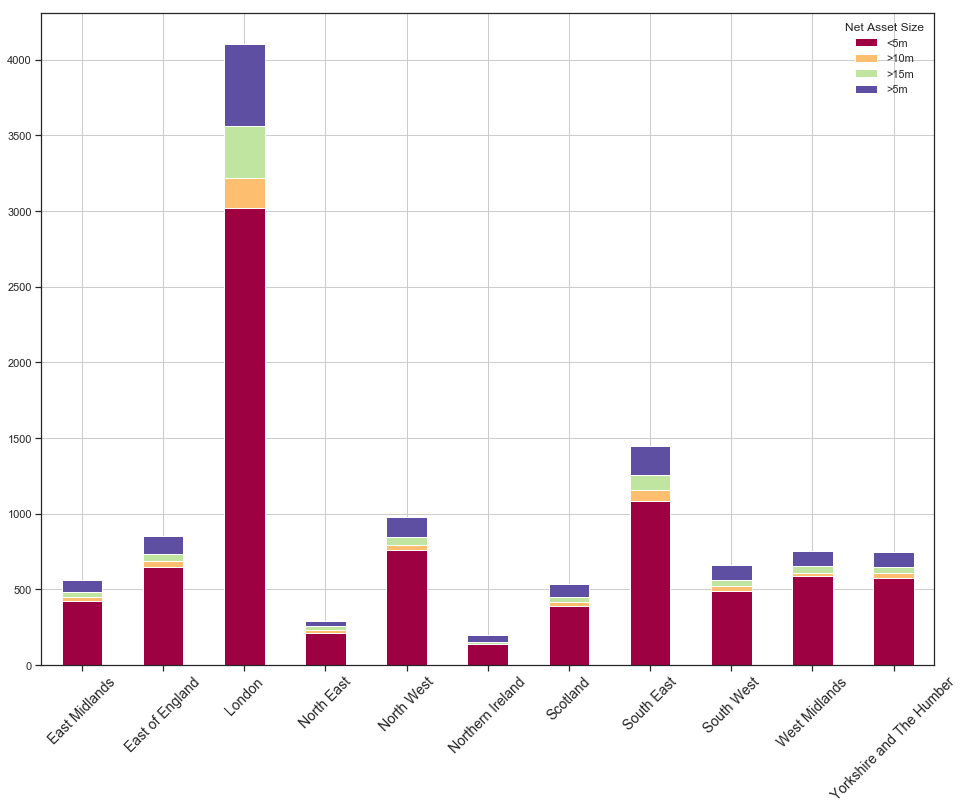

In [66]:
plot_stack(data, ['Location', 'Net Asset Size'])

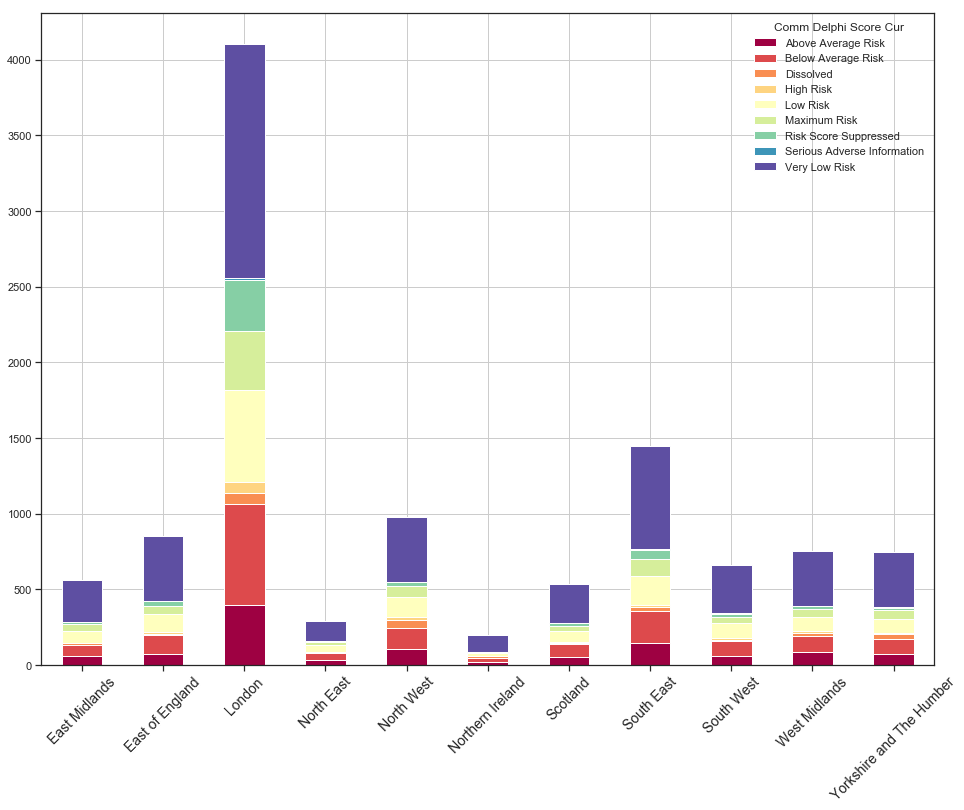

In [67]:
plot_stack(data, ['Location', 'Comm Delphi Score Cur'])

In [68]:
data['date'] = round(data['Date of Incorporation'], 0)

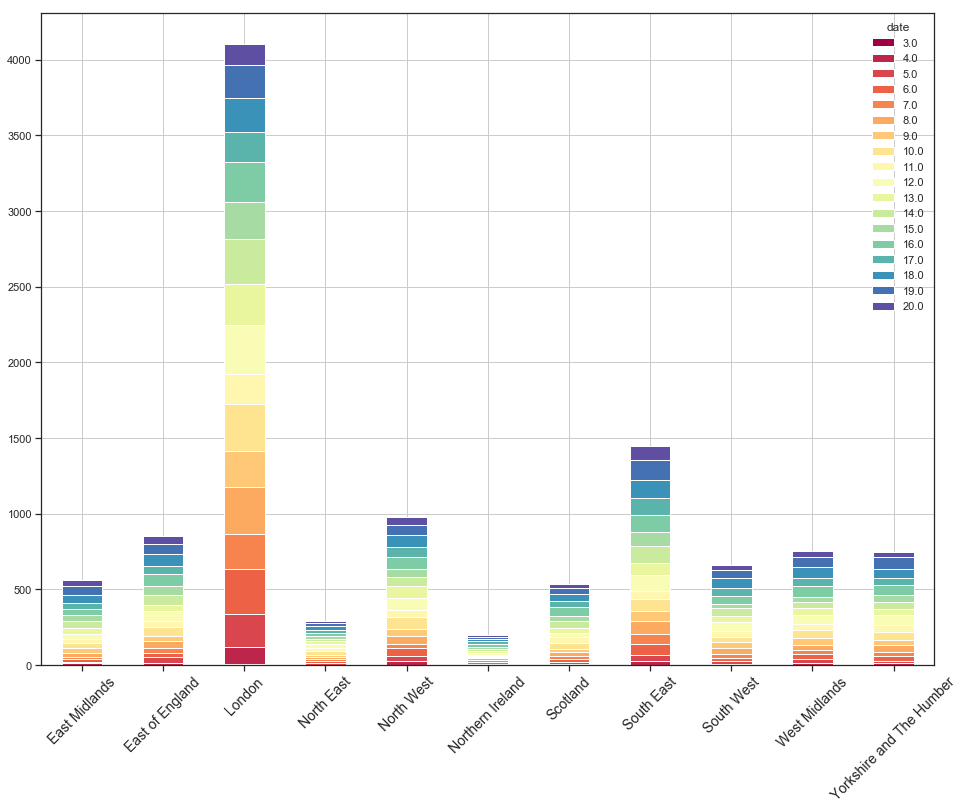

In [69]:
plot_stack(data, ['Location', 'date'])

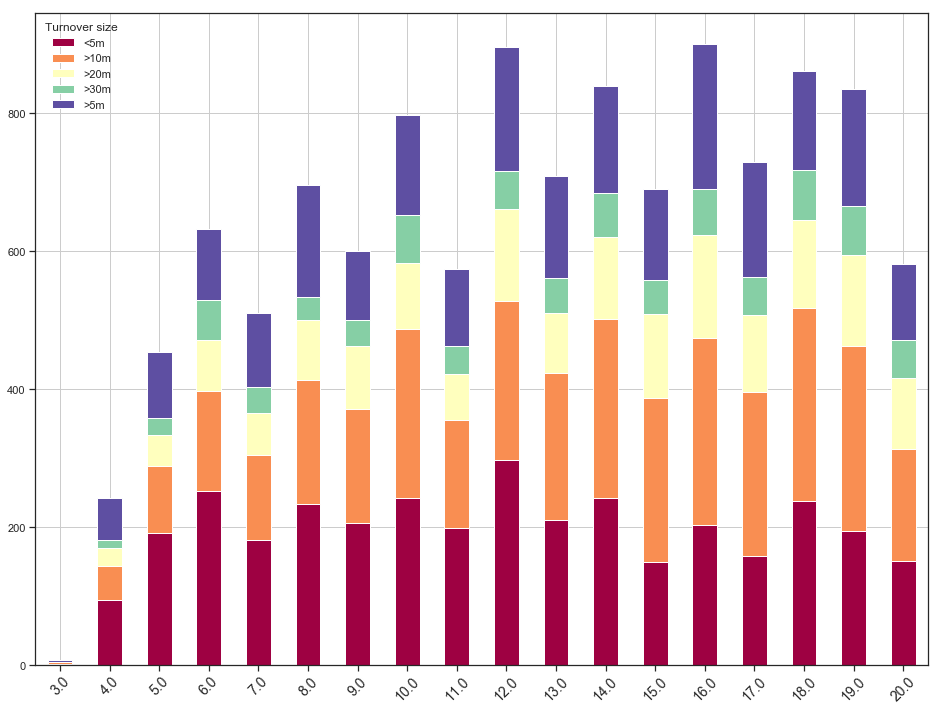

In [70]:
plot_stack(data, ['date', 'Turnover size'])

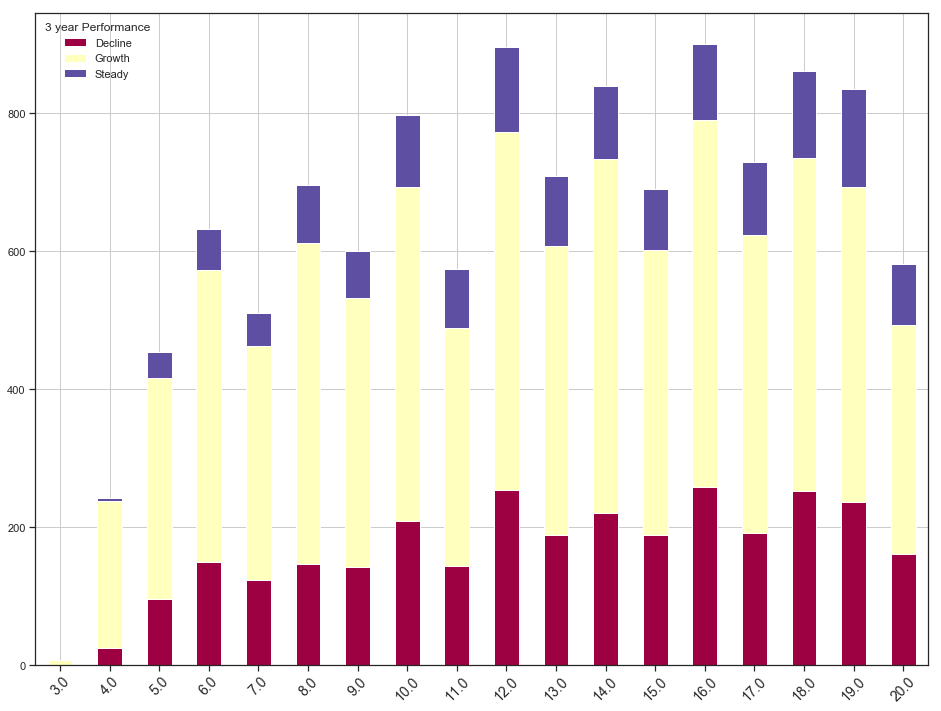

In [71]:
plot_stack(data, ['date', '3 year Performance'])

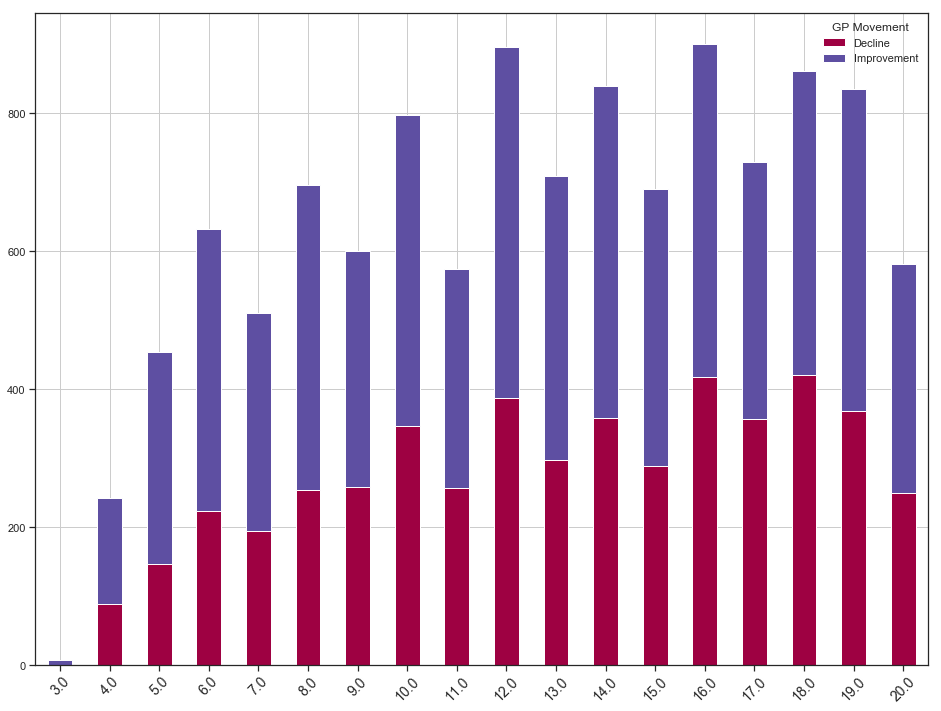

In [72]:
plot_stack(data, ['date', 'GP Movement'])

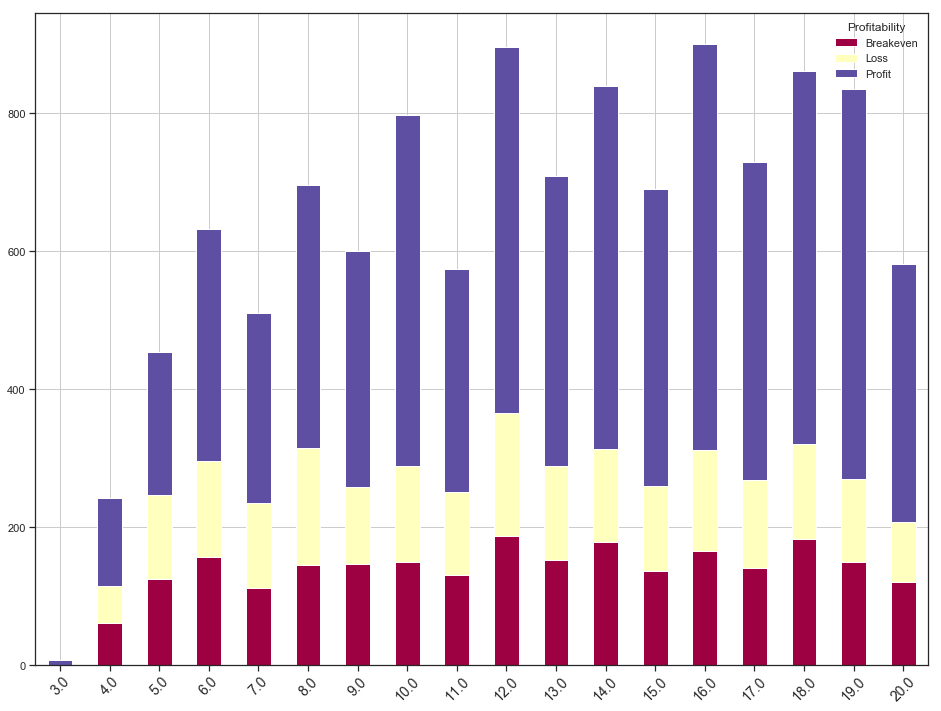

In [73]:
plot_stack(data, ['date', 'Profitability'])

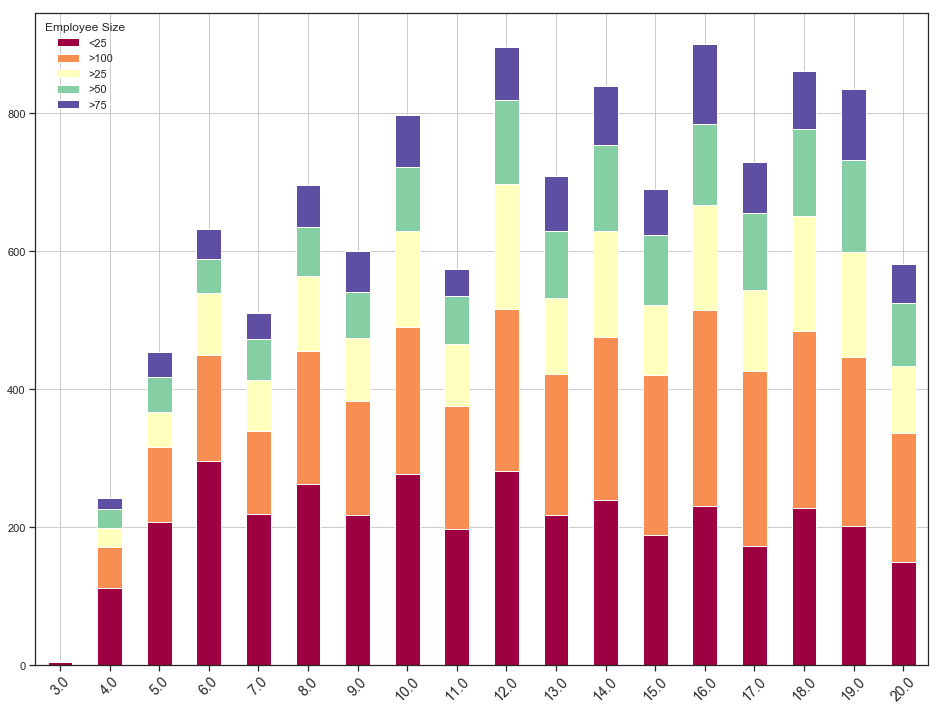

In [74]:
plot_stack(data, ['date', 'Employee Size'])

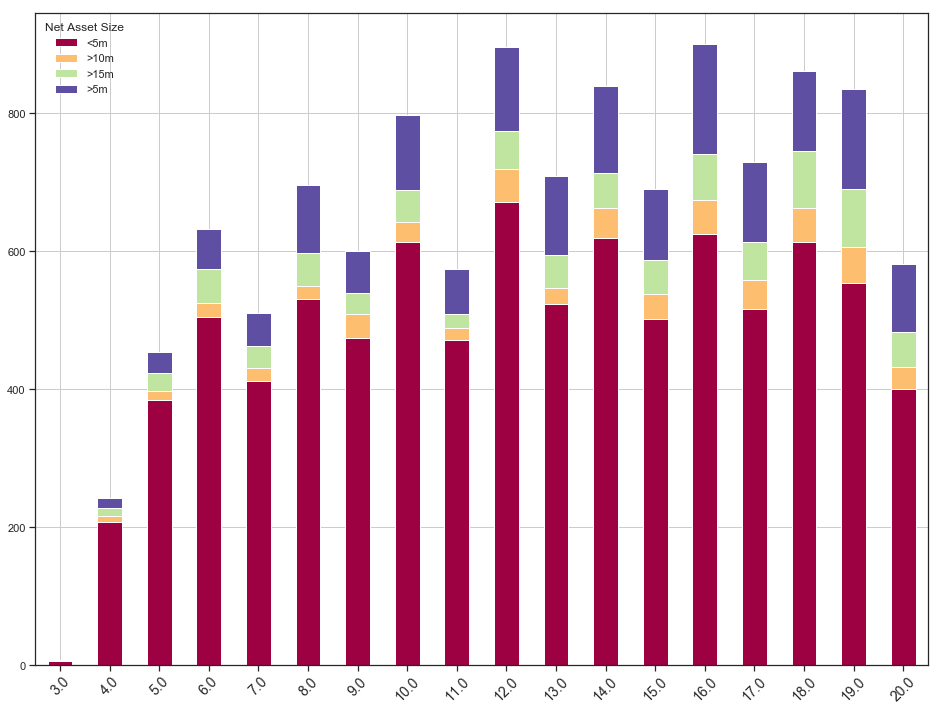

In [75]:
plot_stack(data, ['date', 'Net Asset Size'])

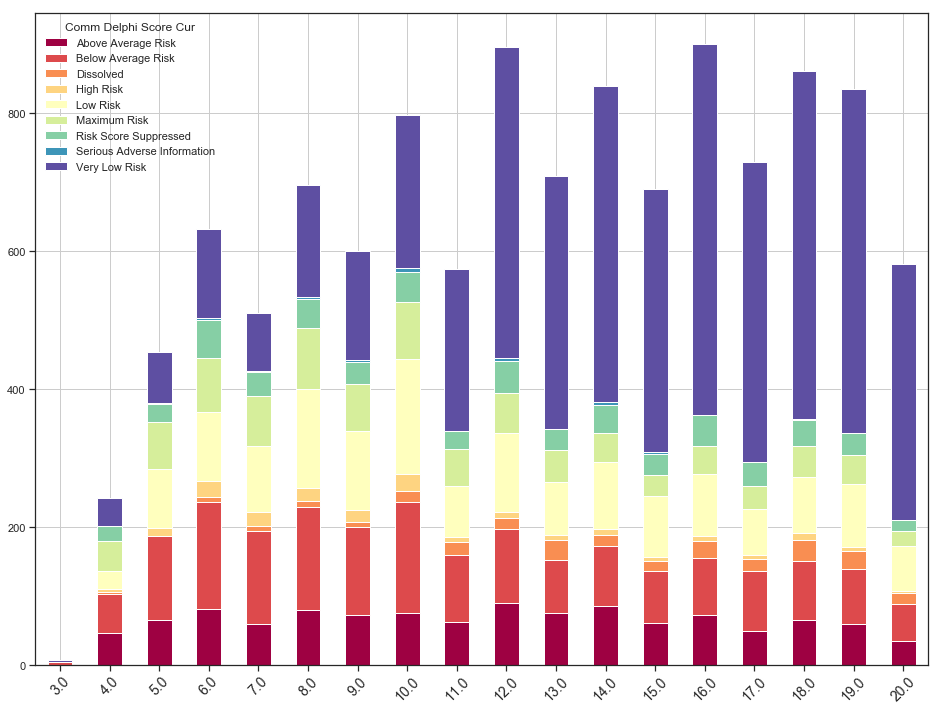

In [76]:
plot_stack(data, ['date', 'Comm Delphi Score Cur'])

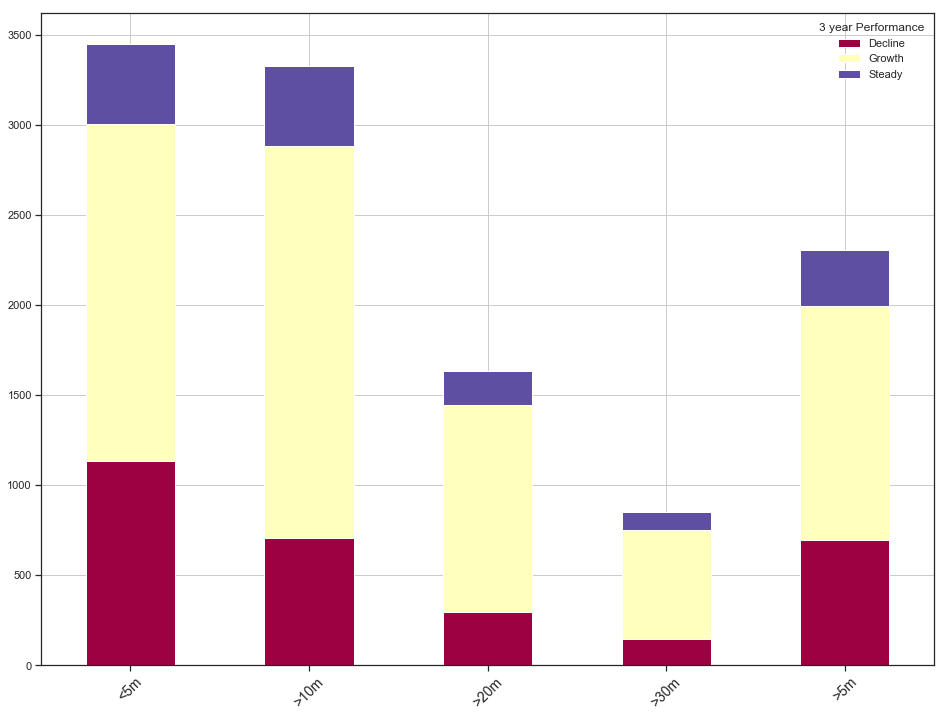

In [77]:
plot_stack(data, ['Turnover size', '3 year Performance'])

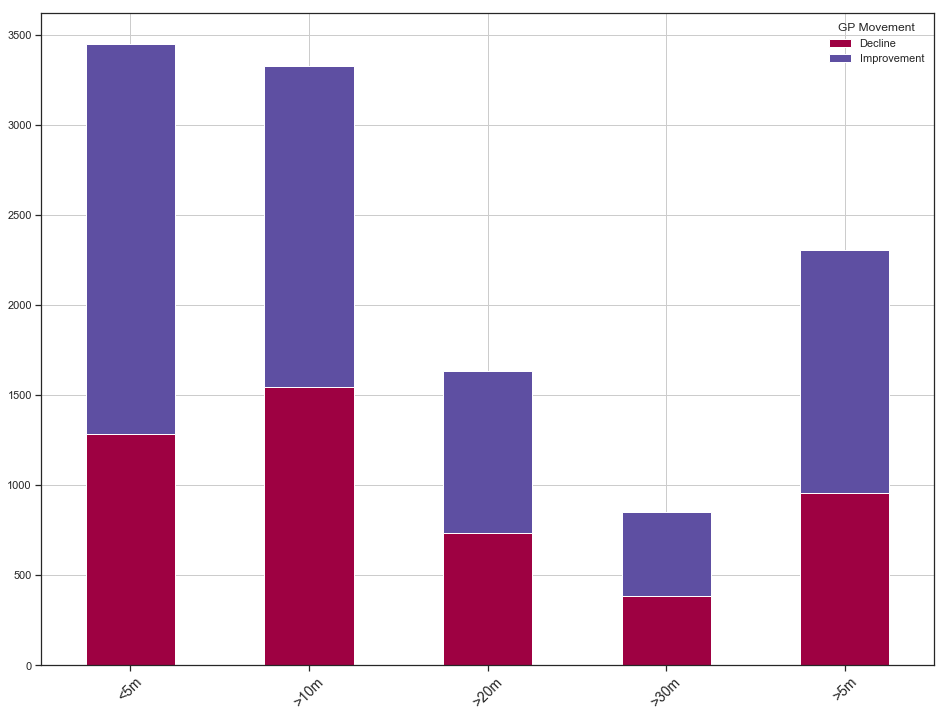

In [78]:
plot_stack(data, ['Turnover size', 'GP Movement'])

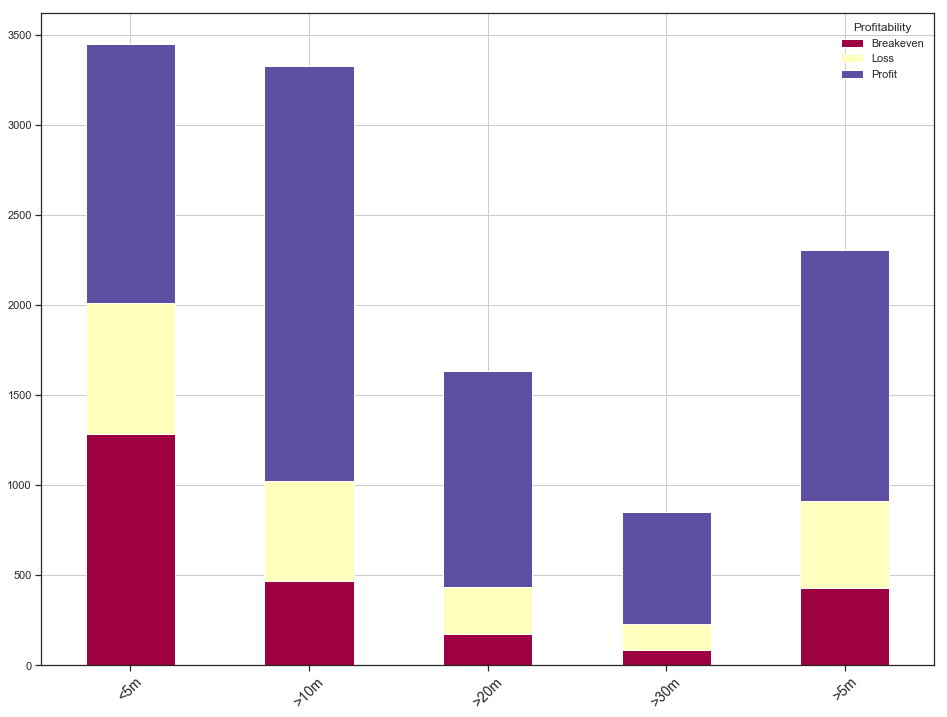

In [79]:
plot_stack(data, ['Turnover size', 'Profitability'])

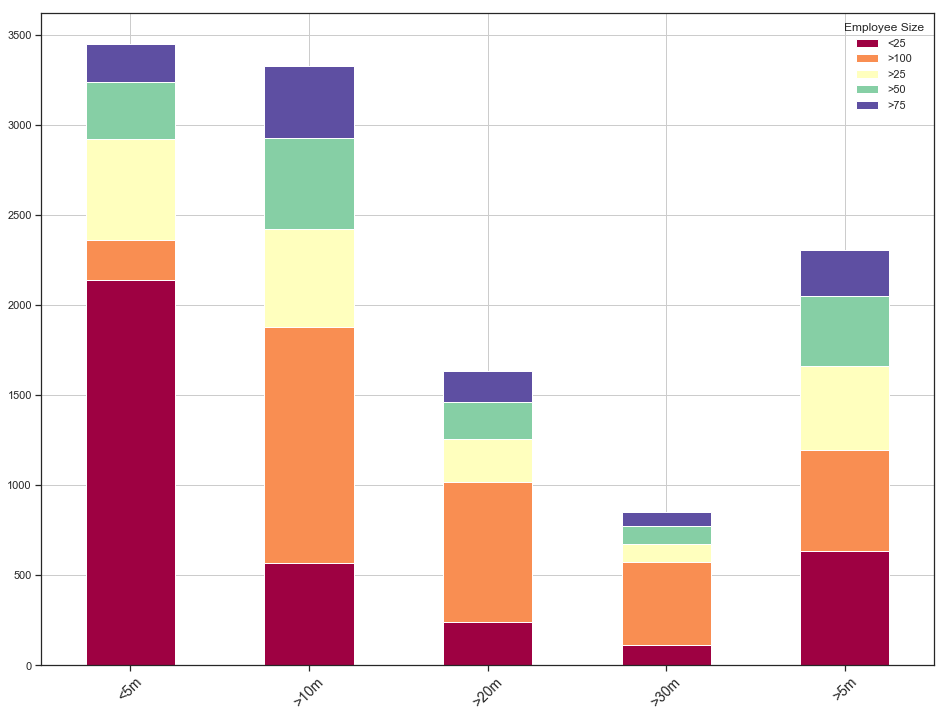

In [80]:
plot_stack(data, ['Turnover size', 'Employee Size'])

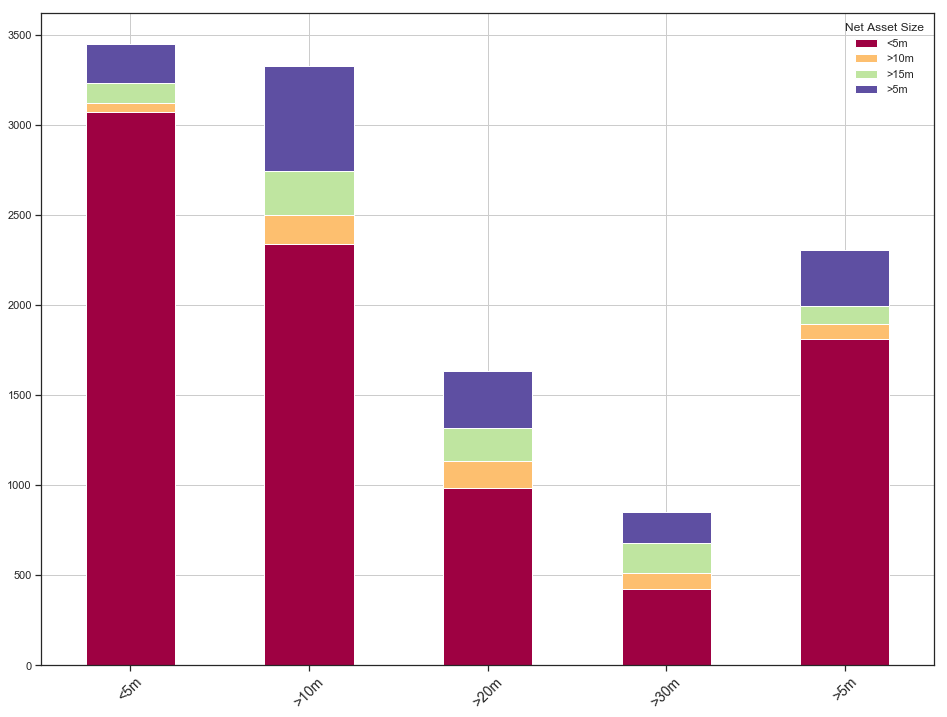

In [81]:
plot_stack(data, ['Turnover size', 'Net Asset Size'])

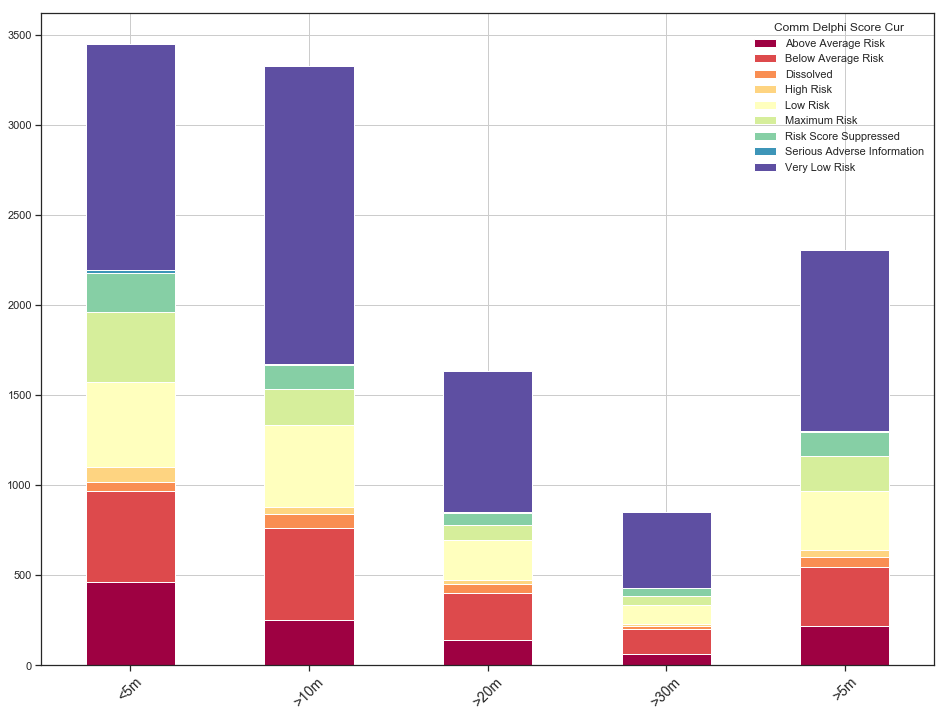

In [82]:
plot_stack(data, ['Turnover size', 'Comm Delphi Score Cur'])

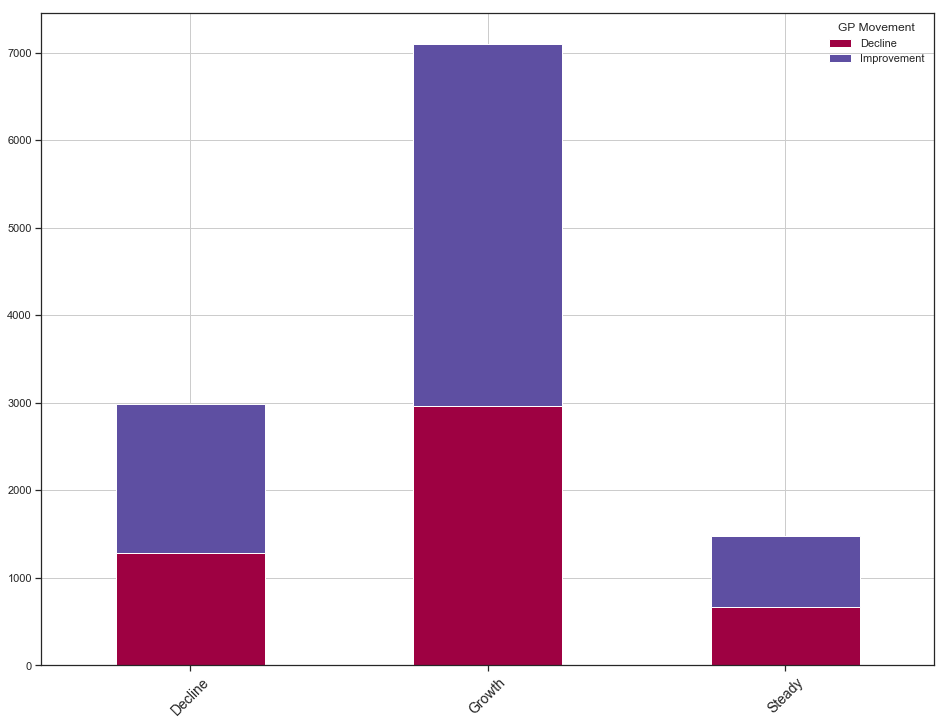

In [83]:
plot_stack(data, ['3 year Performance', 'GP Movement'])

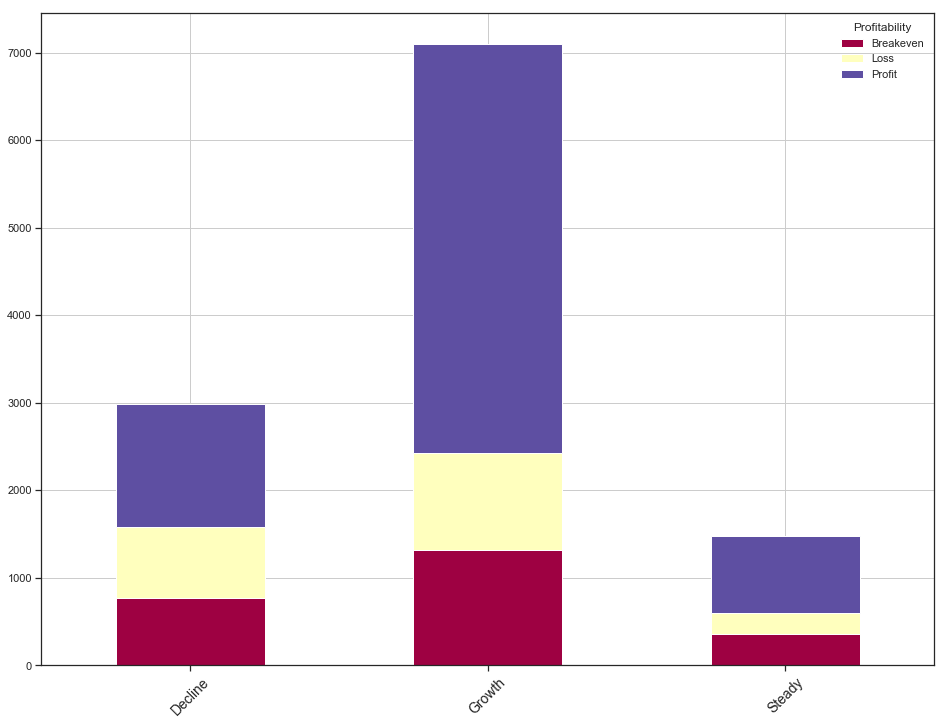

In [84]:
plot_stack(data, ['3 year Performance', 'Profitability'])

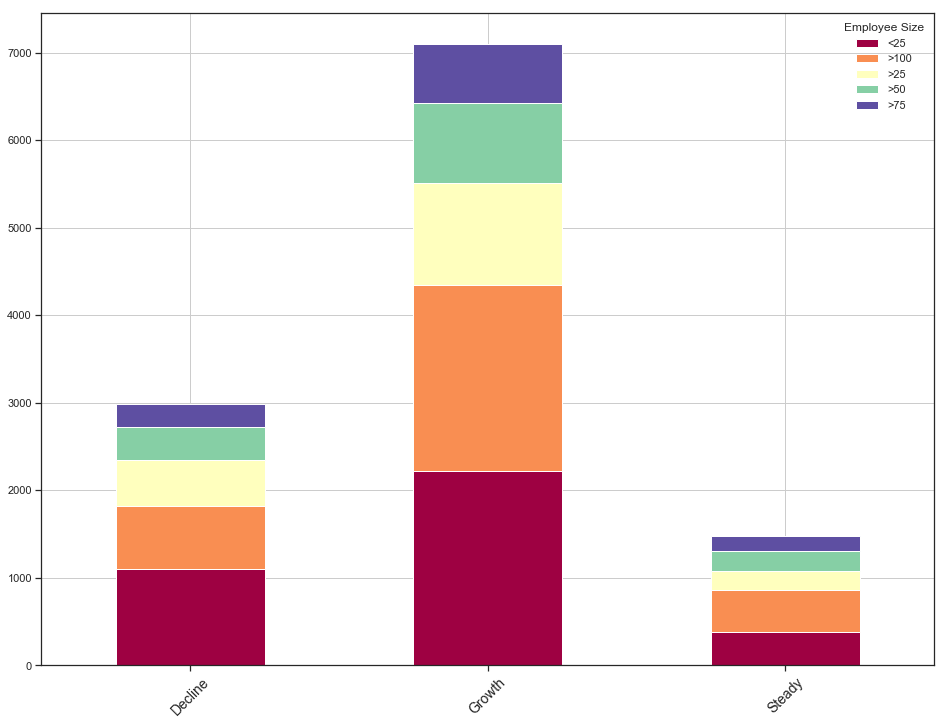

In [85]:
plot_stack(data, ['3 year Performance', 'Employee Size'])

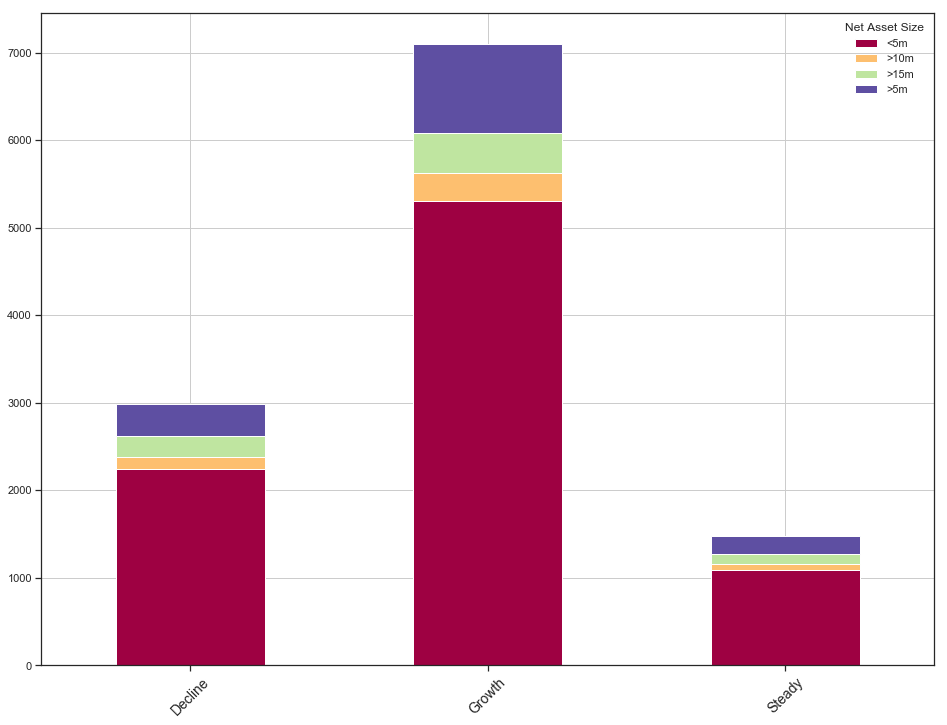

In [86]:
plot_stack(data, ['3 year Performance', 'Net Asset Size'])

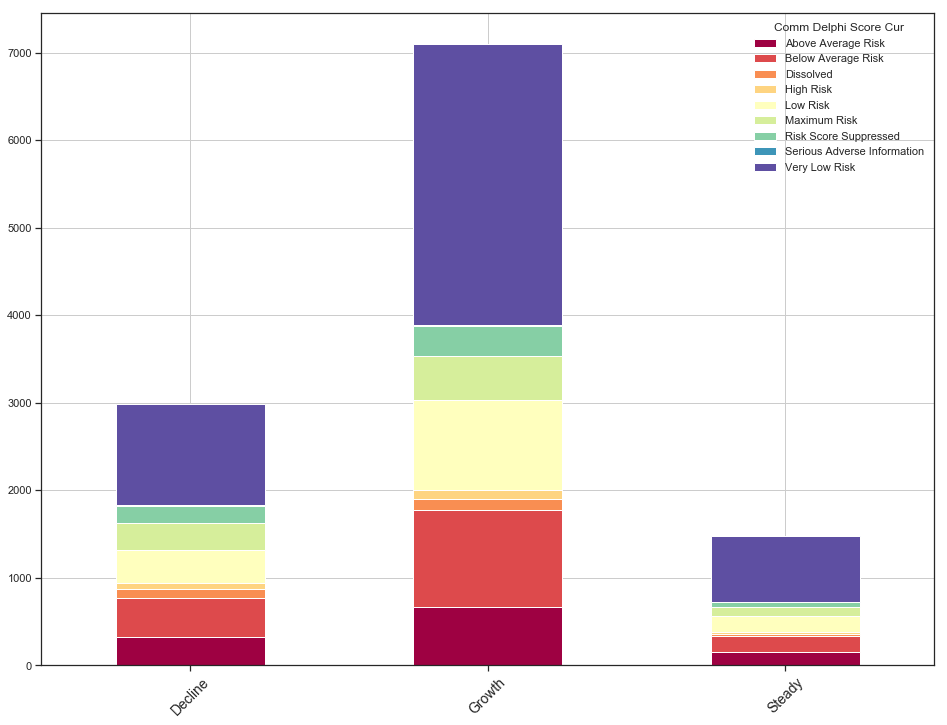

In [87]:
plot_stack(data, ['3 year Performance', 'Comm Delphi Score Cur'])

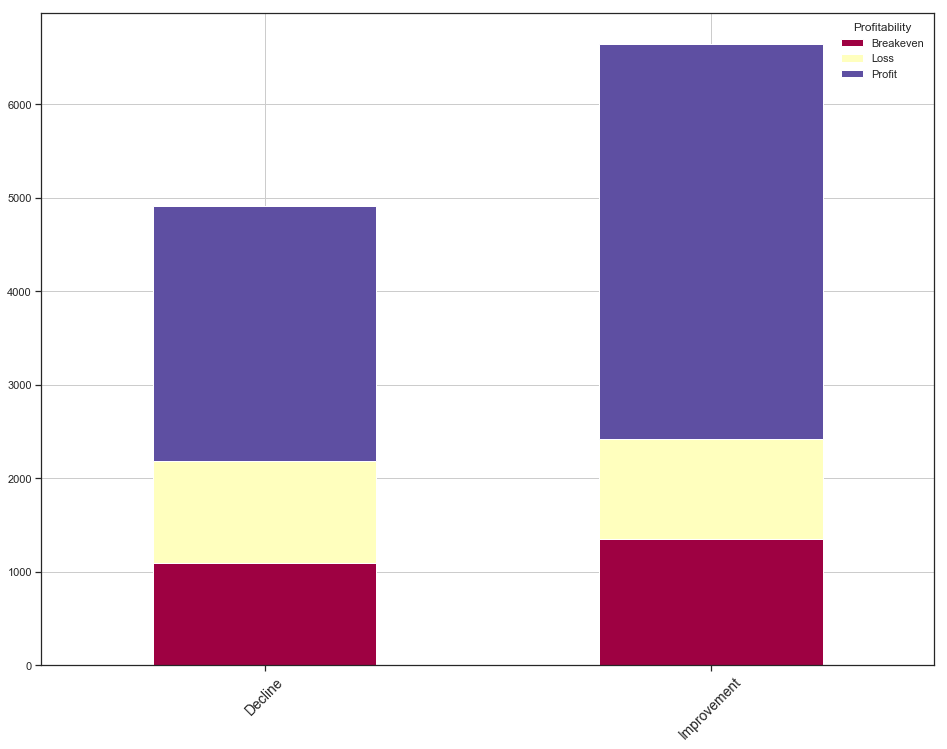

In [88]:
plot_stack(data, ['GP Movement', 'Profitability'])

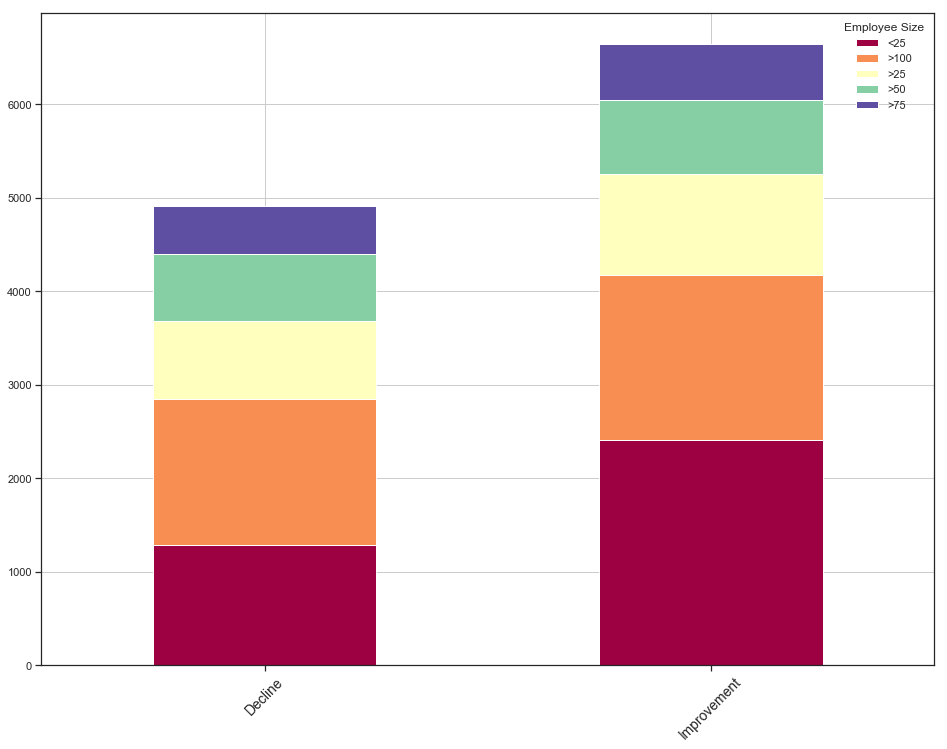

In [89]:
plot_stack(data, ['GP Movement', 'Employee Size'])

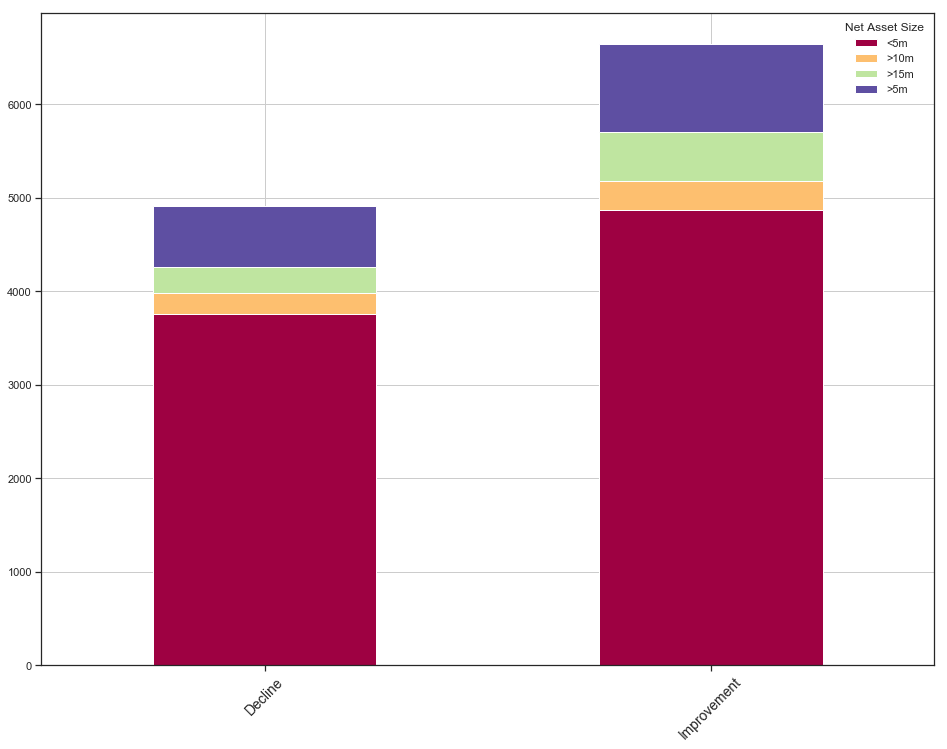

In [90]:
plot_stack(data, ['GP Movement', 'Net Asset Size'])

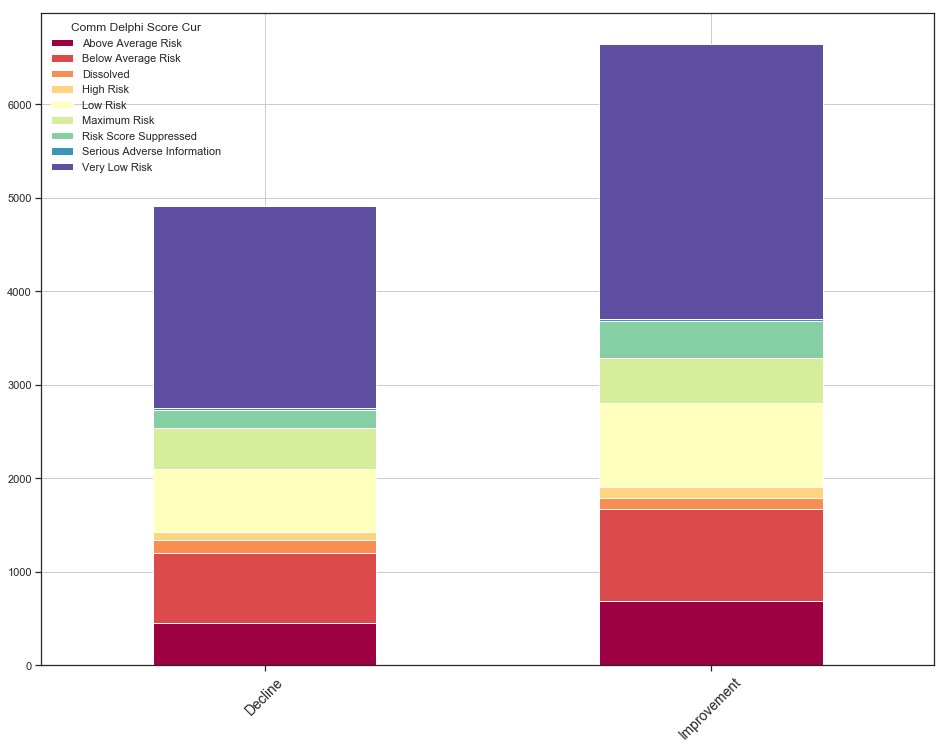

In [91]:
plot_stack(data, ['GP Movement', 'Comm Delphi Score Cur'])

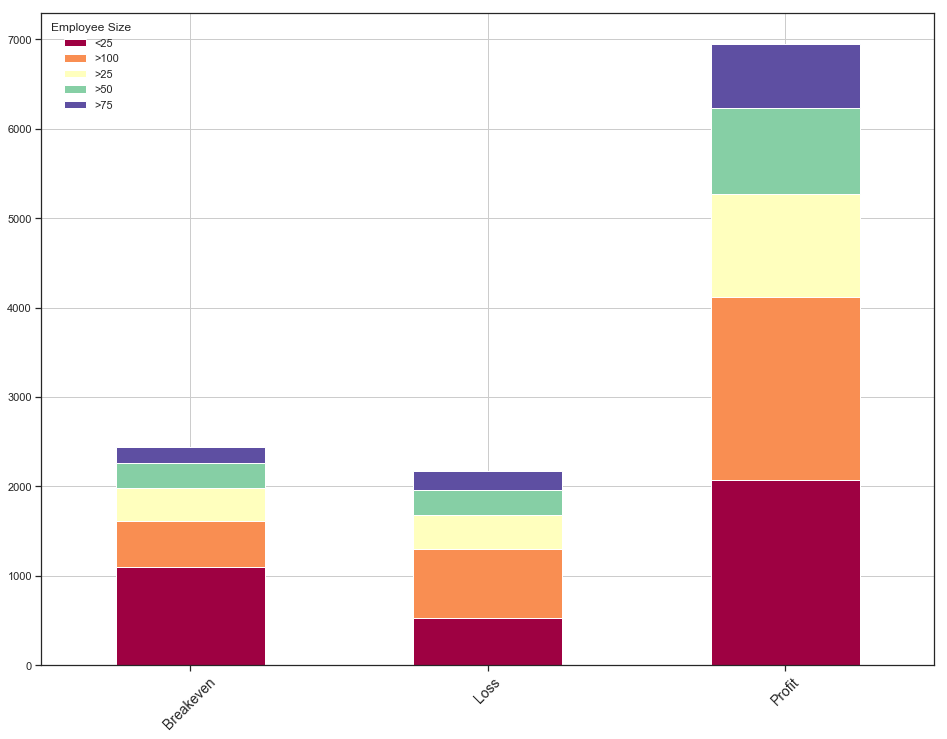

In [92]:
plot_stack(data, ['Profitability', 'Employee Size'])

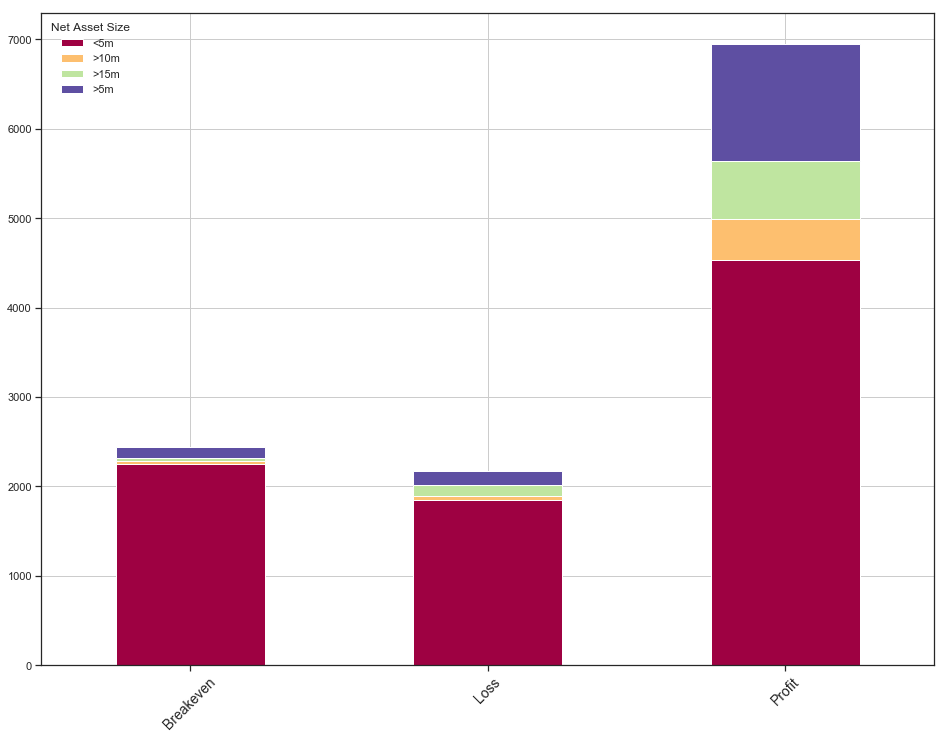

In [93]:
plot_stack(data, ['Profitability', 'Net Asset Size'])

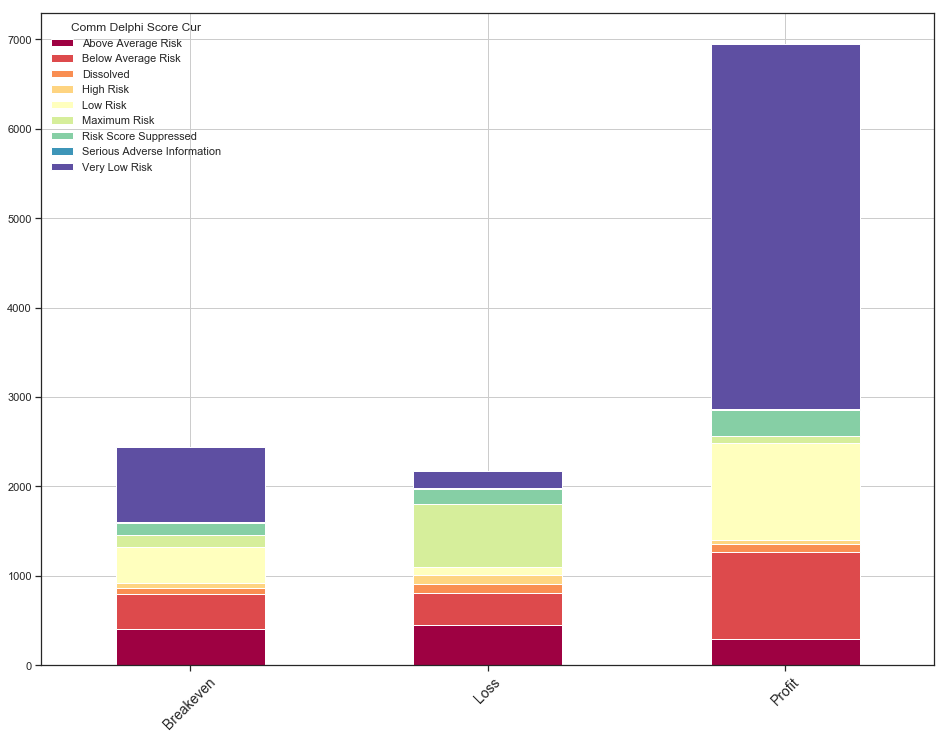

In [94]:
plot_stack(data, ['Profitability', 'Comm Delphi Score Cur'])

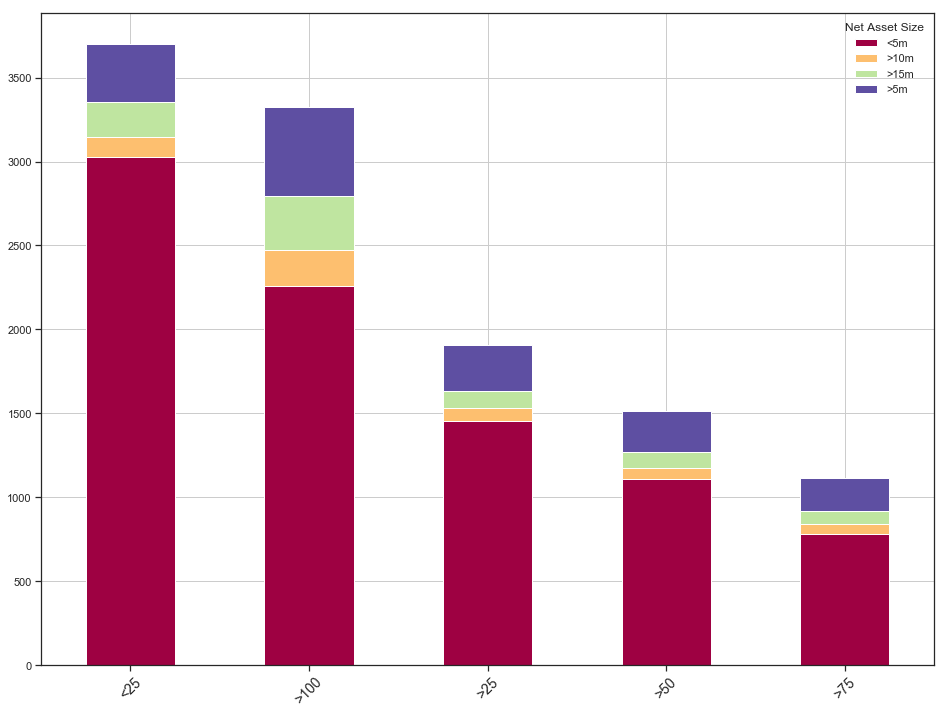

In [95]:
plot_stack(data, ['Employee Size', 'Net Asset Size'])

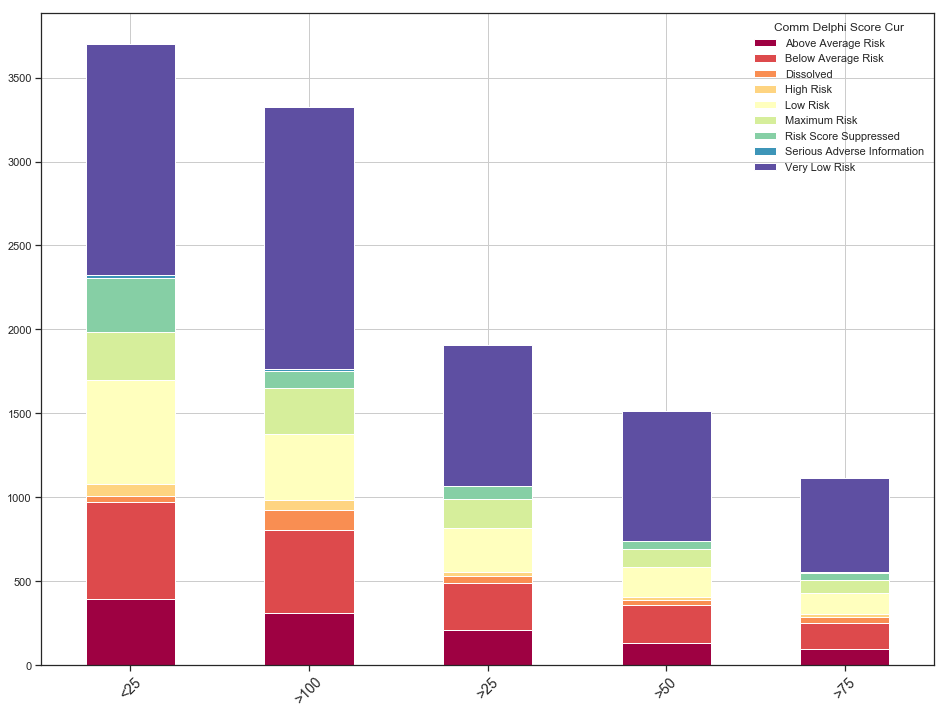

In [96]:
plot_stack(data, ['Employee Size', 'Comm Delphi Score Cur'])

The rest of the variables did not give any value information or the information is redudant, so these features are removed.

### Identify outliers

The features that will be checked for outliers. IQR and boxplots will be used to detect outliers.

'Export Mix'
'GP% 1'
'Number of Employees (Period 1)'
'Total Net Assets (Period 1)

### Z-score

Print all unique outlier values for each variable

In [97]:
colnames = ['Export Mix', 'GP% 1', 'Number of Employees (Period 1)', 'Total Net Assets (Period 1)']

for col in colnames:
    print(str(col) + ": ")
    print(detect_zscore_outliers(data[col], True))
    print("  ----end----  ")

Export Mix: 
{0.74, 0.75, 0.76, 0.78, 0.77, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.92, 1.0, 0.93, 0.85, 0.94, 0.86, 0.95, 0.87, 0.96, 0.88, 0.97, 0.89, 0.98, 0.9, 0.99, 0.91}
  ----end----  
GP% 1: 
{-0.99, -0.91, -0.83, -0.8, -0.76, -0.73, -0.72, -0.7, 1.34, 1.37, -2.47, -1.15, -5.21, -1.29, -1.02, -1.68, -1.76, -9.76, -1.17, -4.48, -2.77, -1.33}
  ----end----  
Number of Employees (Period 1): 
{92750.0, 5264.0, 18000.0, 5171.0, 3833.0}
  ----end----  
Total Net Assets (Period 1): 
{-212971008, 169673344, 177503872, 197867008, 262472320, 283917568, 289366016, 461449984, 637505024, 700313984, 860795008, -161926000, 1129705984, 2487296768, 2804486912, -188727008, 183695008, 205391904, 221742496, 230212000, 298141856, 329565600, 335988000, 411147424, 484424992, 171134000, 223006000, 176796992, 193220160, 267126848, 271439808, 310833984, 342317248, 523986880, 743514816, 932585024, 253571792, 171200224, 174487008, 200341728, 260519008, 265084000, 286315744, 329036000, 421100000, 180934000, 1

### Boxplots

In [98]:
data['Total Net Assets (Period 1)'].iplot(kind='box', xTitle='claps', yTitle='count', title='Total Net Assets (Period 1)')

In [99]:
data['GP% 1'].iplot(kind='box', xTitle='GP% 1', yTitle='count', title='GP% 1')

In [100]:
data['Number of Employees (Period 1)'].iplot(kind='box', xTitle='Number of Employees (Period 1)', yTitle='count', title='Number of Employees (Period 1)')

In [101]:
data['Total Net Assets (Period 1)'].iplot(kind='box', xTitle='Total Net Assets (Period 1)', yTitle='count', title='Total Net Assets (Period 1)')

In Engineering there is some EDA, after transforming the values and picking features.